# Machine Learning e Laboratorio

#### Donatella Biancone

## 1. Dataset

Il dataset è stato creato a partire dai dati relativi ai ricoveri in ospedale per malattie cardiache. Ciascun paziente è descritto da 13 caratteristiche sia categoriche che numeriche e dalla classe (TARGET). Il dataset completo presenta esattamente 300 istanze e la descrizione delle features è la seguente: 

1. **age** - età in anni; 
2. **sex** - (1 = uomo, 0 = donna); 
3. **cp** - tipologia di dolore toracico (0 = asintomatico, 1 = angina atipica, 2 = no angina, 3 = angina); 
4. **trestbps** - pressione sanguigna a riposo al ricovero in mmHg; 
5. **chol** - colesterolo sierico in mg/dl; 
6. **fbs** - glicemia a digiuno > 120 mg/dl (1 = si, 0 = no); 
7. **restecg** - elettrocadiogramma a riposo (0 = ipertrofia ventricolare sinistra, 1 = normale, 2 = anomalia dell’onda ST-T); 
8. **thalach** - massima frequenza cardiaca raggiunta; 
9. **exang** - angina indotta dall’esercizio (1 = si; 0 = no); 
10. **oldpeak** - depressione del tratto ST indotto dall’esercizio rispetto al riposo; 
11. **slope** - pendenza del picco del segmento ST durante l’esercizio (0 = in discesa, 1 = piatto, 2 = in pendenza); 
12. **ca** - numero di vasi sanguigni (0 - 3) colorati colorate mediante fluoro-scopia; 
13. **thal** - thalium stress test (1 = difetto risolto, 2 = normale, 3 = difetto reversibile); 
14. **TARGET** - presenza o meno della malattia (1 = si, 0 = no).

## 2. Obiettivo

Obiettivo del progetto è risolvere un problema di classificazione binaria utilizzando e valutando diversi algoritmi di machine learning, per predire se un paziente è affetto o meno da patologia cardiaca.

## 3. Implementazione

Per l'implementazione dei modelli di classificazione verranno utilizzati i seguenti approcci:

- Logistic Regression
- Naive Bayes
- SVM
- Decision Tree
- Random Forest
- kNN
- XGboost
- Reti Neurali

Alcuni, come la regressione logistica, SVM, KNN, reti neurali, sono stati trattati durante le lezioni. Sono stati sperimentati, oltre a questi, altri algoritmi che per conoscenza ed esperienza passata ho utilizzato e risultano performare bene su problemi di classificazione binaria.

### 3.1. Import delle librerie necessarie

In [1]:
# Basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Deep Larning
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### 3.2. Import del dataset

In [2]:
#Import dataset
dataset = pd.read_csv("train_heart.csv")
dataset.shape

(241, 14)

In [3]:
# check for NA's
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
TARGET      0
dtype: int64

Poichè le variabili *ca* e *thal* contengono valori nulli, vengono imputati questi valori con la moda, ovvero il valore più frequente:

In [4]:
# Replace NA's
dataset['thal'] = dataset.thal.fillna(float(dataset.thal.mode()))
dataset['ca'] = dataset.ca.fillna(float(dataset.ca.mode()))
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,TARGET
0,43,1,0,115,303,0,1,181,0,1.2,1,0.0,2.0,0
1,51,0,2,130,256,0,0,149,0,0.5,2,0.0,2.0,0
2,60,0,0,150,258,0,0,157,0,2.6,1,2.0,3.0,1
3,63,1,0,130,330,1,0,132,1,1.8,2,3.0,3.0,1
4,48,1,0,130,256,1,0,150,1,0.0,2,2.0,3.0,1


In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
TARGET      0
dtype: int64

### 3.3. Analisi esplorativa delle variabili

Per prima cosa viene visualizzata la matrice di correlazione tra le variabili:

In [6]:
# Correlation analysis of features against target y
print(dataset.corr()["TARGET"].abs().sort_values(ascending=False))

TARGET      1.000000
ca          0.491447
oldpeak     0.454625
thalach     0.447685
exang       0.439355
cp          0.406041
thal        0.372452
slope       0.335295
sex         0.279372
age         0.273949
trestbps    0.182644
restecg     0.124881
chol        0.047306
fbs         0.041480
Name: TARGET, dtype: float64


Nessuna delle variabili ha una correlazione positiva o negativa particolarmente alta con la variabile target. Nei modelli di machine learning verranno tenute tutte le variabili.

Viene create una copia del dataset per procedere con la riassegnazione di alcune variabili categoriche con lo scopo di rendere più comprensibile l'analisi esplorativa:

In [7]:
# Copy of dataset, in order to perform exploratory data analysis without alter original dataset
data = dataset.copy()

In [8]:
# Assign some factor levels to binary variable
data['sex'][data['sex'] == 0] = 'donna'
data['sex'][data['sex'] == 1] = 'uomo'


data['cp'][data['cp'] == 0] = 'asintomatico'
data['cp'][data['cp'] == 1] = 'angina atipica'
data['cp'][data['cp'] == 2] = 'no angina'
data['cp'][data['cp'] == 3] = 'angina'

data['fbs'][data['fbs'] == 0] = 'minore di 120mg/ml'
data['fbs'][data['fbs'] == 1] = 'maggiore di 120mg/ml'

data['restecg'][data['restecg'] == 0] = 'ipertrofia ventricolare sinistra'
data['restecg'][data['restecg'] == 1] = 'normale'
data['restecg'][data['restecg'] == 2] = 'anomalia dell’onda ST-T'

data['exang'][data['exang'] == 0] = 'no'
data['exang'][data['exang'] == 1] = 'si'

data['slope'][data['slope'] == 0] = 'in discesa'
data['slope'][data['slope'] == 1] = 'piatto'
data['slope'][data['slope'] == 2] = 'in pendenza'

data['thal'][data['thal'] == 1] = 'difetto risolto'
data['thal'][data['thal'] == 2] = 'normale'
data['thal'][data['thal'] == 3] = 'difetto reversibile'

data['TARGET'][data['TARGET'] == 0] = 'no malattia'
data['TARGET'][data['TARGET'] == 1] = 'malattia'

#### 3.3.1. Variabile target y

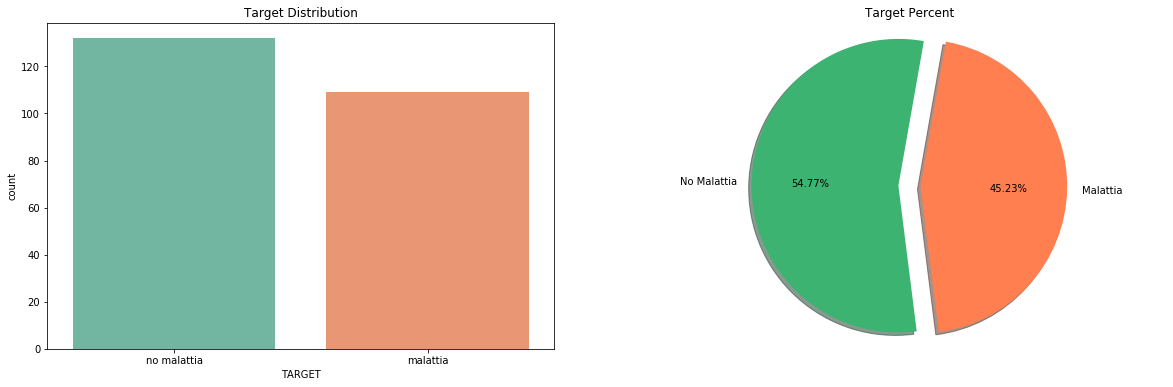

In [9]:
# Plot of target variable y with countplot and piechart
def plot1():
    plt.figure(figsize=(20, 6))
    
    # plot target distribution with countplot
    plt.subplot(1,2,1)
    p1 = sns.countplot(data["TARGET"], palette='Set2')
    p1.set_title('Target Distribution')
    
    # plot target percent with piechart
    plt.subplot(1,2,2)
  
    target_count = [len(data[data['TARGET'] == 'no malattia']),len(data[data['TARGET'] == 'malattia'])]
    colors = ['mediumseagreen', 'coral']
    labels = ['No Malattia', 'Malattia']
    explode = (0.05, 0.1)
    p2 = plt.pie(target_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=80)
    plt.title('Target Percent')
    plt.axis('equal')
  
plot1()

In [10]:
target_tmp = dataset.TARGET.value_counts()
print("Percentuale di pazienti senza patologie cardiache: {:.2f}%".format(target_tmp[0]/(len(dataset.TARGET))*100))
print("Percentuale di pazienti con patologie cardiache: {:.2f}%".format(target_tmp[1]/(len(dataset.TARGET))*100))

Percentuale di pazienti senza patologie cardiache: 54.77%
Percentuale di pazienti con patologie cardiache: 45.23%


La distribuzione della variabile *target* è quasi equa. I dati non sono sbilanciati. 

#### 3.3.2. Variabili categoriche rispetto al target y

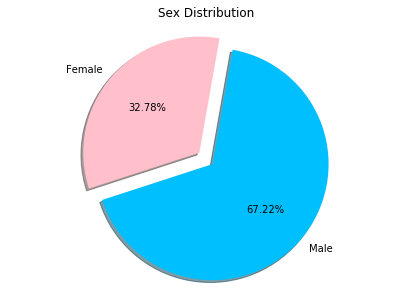

In [11]:
#Plot variabile 'sex' against y
def plot2():
  plt.figure(figsize=(7, 5))
  sex_count = [len(data[data['sex'] == 'donna']),len(data[data['sex'] == 'uomo'])]
  labels = ['Female', 'Male']
  colors = ['pink', 'deepskyblue']
  explode = (0.05, 0.1)
  plt.pie(sex_count, explode=explode, labels=labels, 
        colors=colors,autopct='%4.2f%%',shadow=True, startangle=80)
  plt.title('Sex Distribution')
  plt.axis('equal')
  plt.show()
  
plot2()

La popolazione maschile è molto più elevata e quindi con maggiore probabilità di essere presente nella diagnosi di malattia.

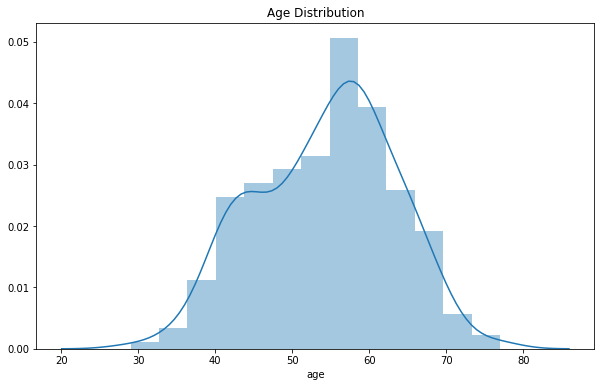

In [12]:
# Plot age distribution
def plot3():
    plt.figure(figsize=(10,6))
    sns.distplot(data['age'])
    plt.title('Age Distribution')
    plt.show()
plot3()  

L'età della popolazione è più o meno distribuita normalmente.

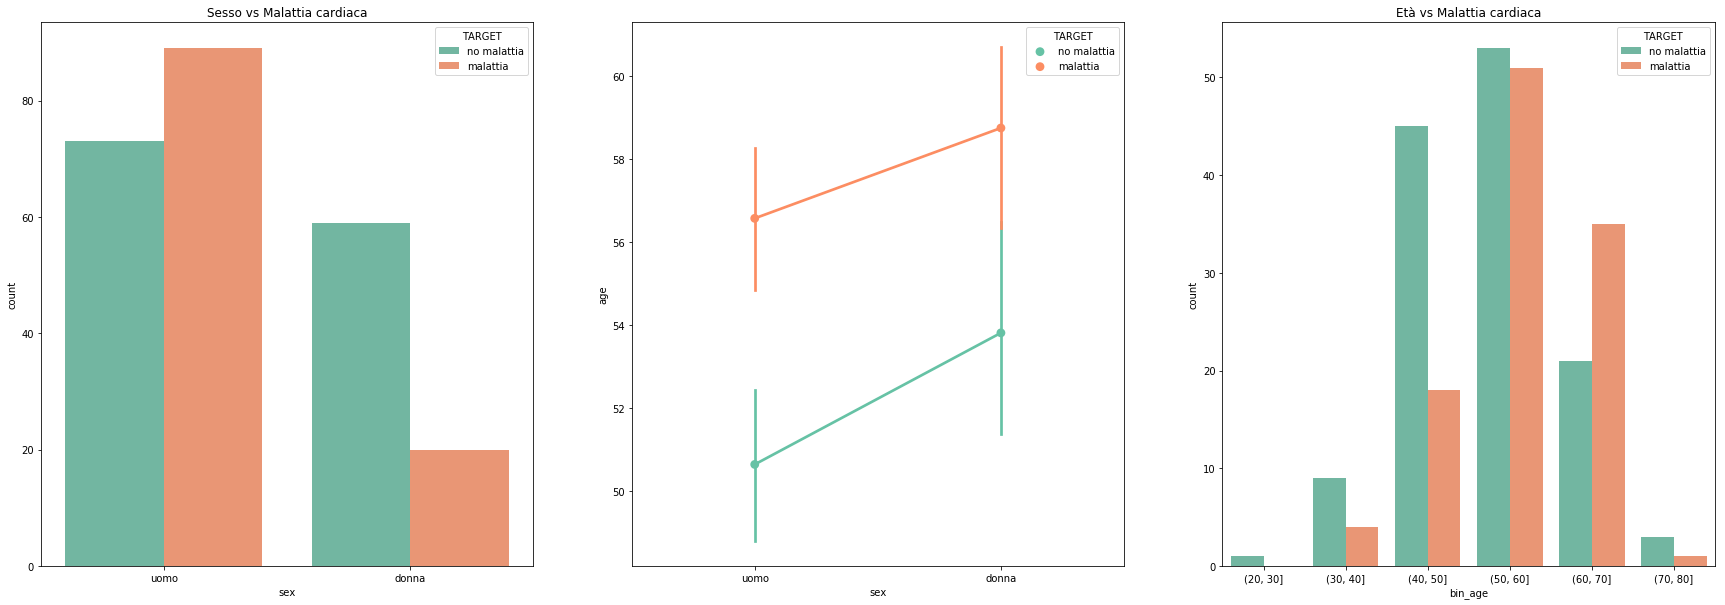

In [13]:
# Plot 'sex' and 'age' against y
def plot4():
 
    plt.figure(figsize=(30,10))
    
    age_bins = [20,30,40,50,60,70,80]
    data['bin_age'] = pd.cut(data['age'], bins=age_bins)
  
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='sex', data=data, hue='TARGET', palette='Set2')
    p1.set_title('Sesso vs Malattia cardiaca')
    
    plt.subplot(1,3,2)
    p2 = sns.pointplot(x='sex', y='age', data=data, hue='TARGET', palette='Set2')
    p1.set_title('Sesso vs Malattia cardiaca')
        
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_age', data=data, hue='TARGET', palette='Set2')
    p3.set_title('Età vs Malattia cardiaca')
    
plot4()

- La *figura 1* mostra che gli uomini hanno più probabilità di sviluppare malattie cardiache.

- La *figura 2* mostra che l'età media delle donne con patologie cardiache è 54 anni, mentre per gli uomini è 51 anni

- La *figura 3* mostra come la fascia di età tra i 40 e i 70 anni è quella con più probabilità di avere patologie cardiache.

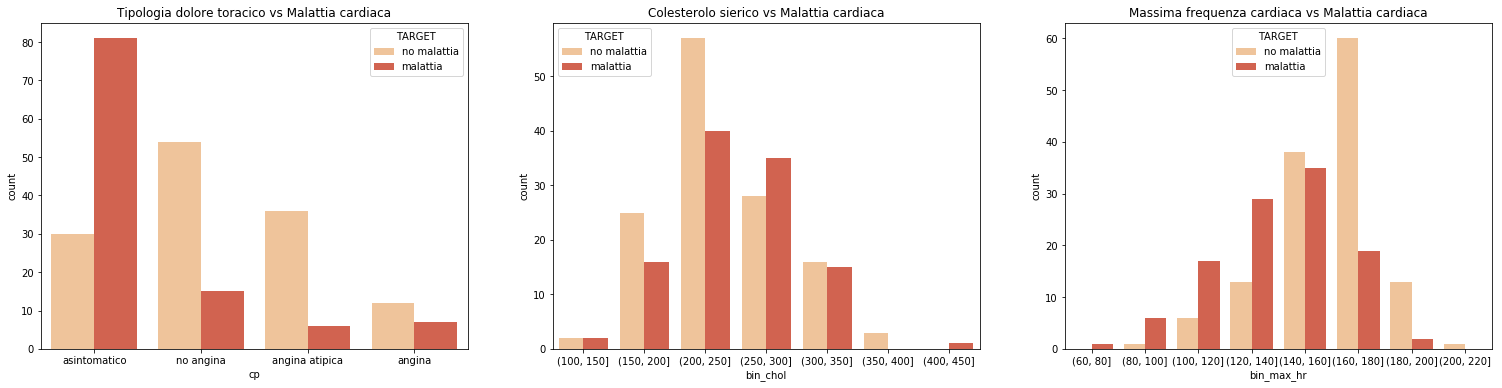

In [14]:
# Plot 'cp', 'chol' and 'thalac' against y
def plot5():
  
    plt.figure(figsize=(26,6))
    chol_bins = [100,150,200,250,300,350,400,450]
    max_hr_bins = [60,80,100,120,140,160,180,200,220]
    
    data['bin_chol'] = pd.cut(data['chol'], bins=chol_bins)
    data['bin_max_hr'] = pd.cut(data['thalach'], bins=max_hr_bins)
    
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='cp', data=data, hue='TARGET', palette='OrRd')
    p1.set_title('Tipologia dolore toracico vs Malattia cardiaca')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='bin_chol', data=data, hue='TARGET', palette='OrRd')
    p2.set_title('Colesterolo sierico vs Malattia cardiaca')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='bin_max_hr', data=data, hue='TARGET', palette='OrRd')
    p3.set_title('Massima frequenza cardiaca vs Malattia cardiaca')
    
plot5()

- La *figura 1* mostra che l'angina atipica è presente in molte patologie cardiache

- La *figura 2* mostra che sono stati riscontrati nella maggior parte dei pazienti con patologie cardiache livelli di colesterolo tra i 200 e i 300 mg/dl

- La *figura 3* mostra che sono stati riscontrati nella maggior parte dei pazienti con cardiache frequenze cardiache tra 140 e 180 

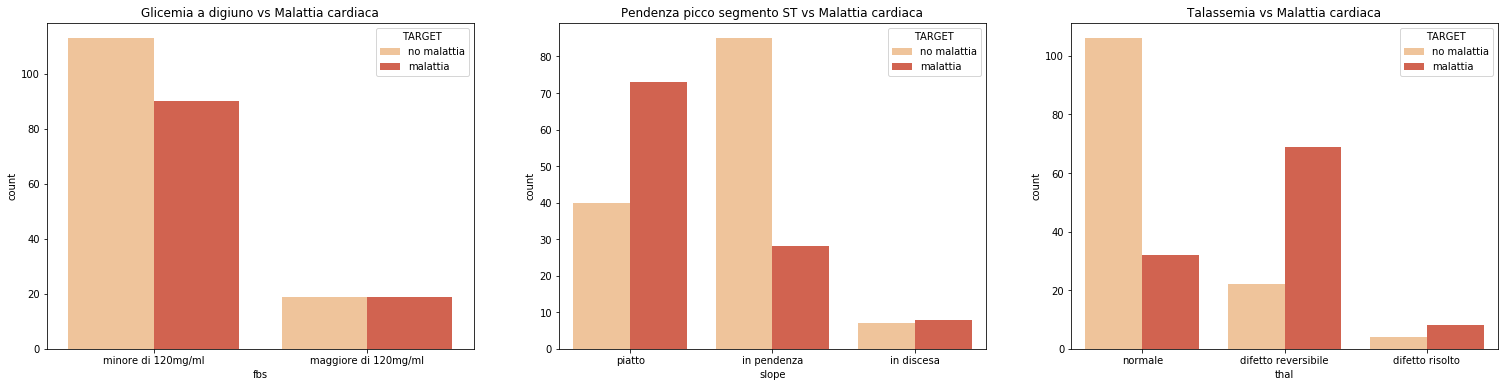

In [15]:
# Plot 'fbs', 'slope' and 'thal' against y
def plot6():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='fbs', data=data, hue='TARGET', palette='OrRd')
    p1.set_title('Glicemia a digiuno vs Malattia cardiaca')
        
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='slope', data=data, hue='TARGET', palette='OrRd')
    p2.set_title('Pendenza picco segmento ST vs Malattia cardiaca')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='thal', data=data, hue='TARGET', palette='OrRd')
    p3.set_title('Talassemia vs Malattia cardiaca')
plot6()

- La *figura 1* mostra che la maggior parte dei pazienti con patologie cardiache hanno livelli di glicemia a digiuno inferiori a 120mg/ml
- La *figura 2* mostra che la maggior parte dei pazienti con patologie cardiache hanno una pendenza di picco del segmento ST piatto.
- La *figura 3* mostra che i pazienti con talassemia reversibile o risolta hanno maggiori probabilità di sviluppare patologie cardiache.

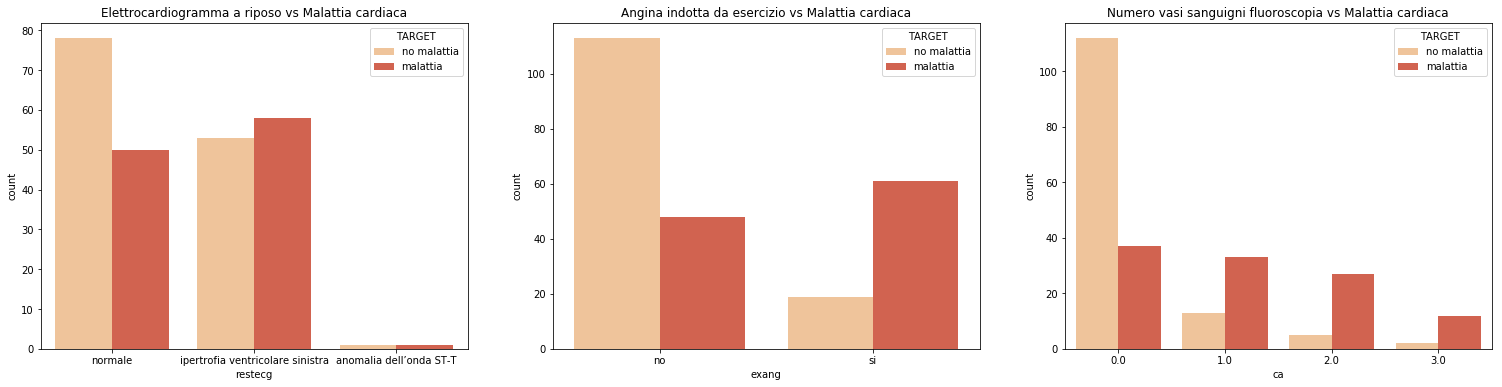

In [16]:
# Plot 'restecg', 'exang' and 'ca' against y
def plot7():
    plt.figure(figsize=(26,6))
    plt.subplot(1,3,1)
    p1 = sns.countplot(x='restecg', data=data, hue='TARGET', palette='OrRd')
    p1.set_title('Elettrocardiogramma a riposo vs Malattia cardiaca')
    
    plt.subplot(1,3,2)
    p2 = sns.countplot(x='exang', data=data, hue='TARGET', palette='OrRd')
    p2.set_title('Angina indotta da esercizio vs Malattia cardiaca')
    
    plt.subplot(1,3,3)
    p3 = sns.countplot(x='ca', data=data, hue='TARGET', palette='OrRd')
    p3.set_title('Numero vasi sanguigni fluoroscopia vs Malattia cardiaca')
    
plot7()

- La *figura 1* mostra che la maggior parte dei pazienti con patologie cardiache presentano un'ipertrofia ventricolare sinistra nell'elettrocardiogramma a riposo.
- La *figura 2* mostra che la maggior parte dei pazienti con patologie cardiache presentan angina indotta dall'esercizio fisico.
- La *figura 3* mostra che nella maggior parte dei pazienti con patologie cardiache il numero di vasi sanguigni colorati mediante fluoro-scopia è maggiore di zero.

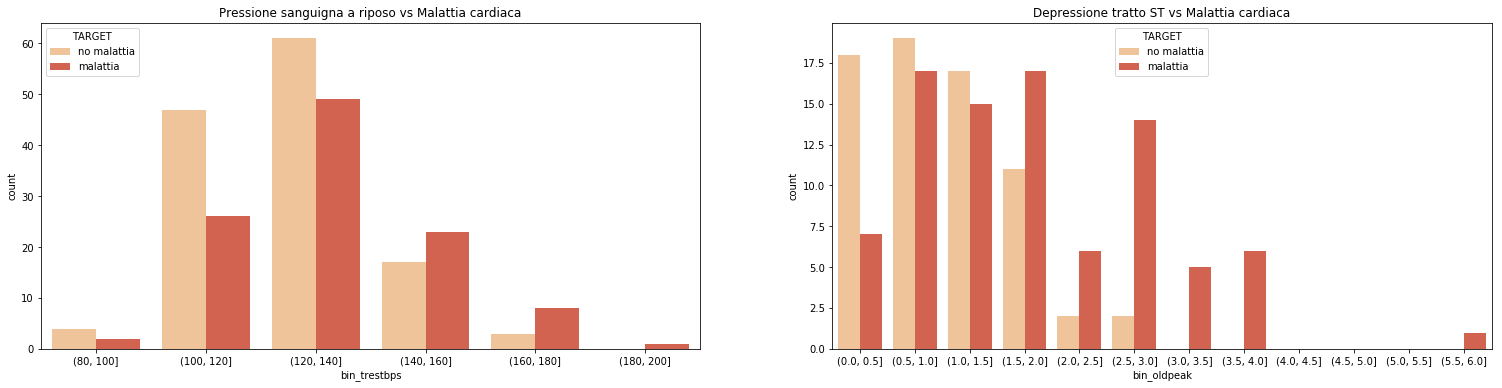

In [17]:
# Plot 'trestbps' and 'oldpeak' against y
def plot7():
    plt.figure(figsize=(26,6))
     
    trestbps_bins = [80,100,120,140,160,180,200]
    oldpeak_bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6]
    data['bin_trestbps'] = pd.cut(data['trestbps'], bins=trestbps_bins)
    data['bin_oldpeak'] = pd.cut(data['oldpeak'], bins=oldpeak_bins)
    
    plt.subplot(1,2,1)
    p1 = sns.countplot(x='bin_trestbps', data=data, hue='TARGET', palette='OrRd')
    p1.set_title('Pressione sanguigna a riposo vs Malattia cardiaca')
    
    plt.subplot(1,2,2)
    p2 = sns.countplot(x='bin_oldpeak', data=data, hue='TARGET', palette='OrRd')
    p2.set_title('Depressione tratto ST vs Malattia cardiaca')
    
plot7()

- La *figura 1* mostra che la maggior parte dei pazienti con patologie cardiache presentano una pressione sanguigna a risposo tra 120 e 140 mmHg
- La *figura 2* mostra che valori più bassi di depressione del tratto ST indotti dall'esercizio fisico sono presenti nei pazienti che sviluppano malattie cardiache 

### 3.4. Machine Learning

Per alcuni algoritmi proposti, in particolare *SVM*, *Decision Tree*, *Random Forest* e *KNN* sono state utilizzate tecniche di **cross-validation** per il tuning di alcuni iperparametri più importanti, con lo scopo di massimizzare l'accuratezza. 
Per gli algoritmi proposti la confusion matrix è nella forma:

TP FP

FN TN

L'accuracy è calcolata come: (TP + TN)/(TP + TN + FP + FN)

#### 3.4.1. Data preparation

In [18]:
# Create Training and Test sets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### 3.4.2. Logistic Regression

La ***Regressione Logistica*** un metodo statistico per l'analisi di dataset in cui ci sono una o più variabili indipendenti che determinano un risultato di una variabile dipendente; il risultato viene misurato con una variabile dicotomica (2 possibili valori).
L'obiettivo della regressione logistica è trovare è trovare il miglior modello per descrivere la relazione tra la caratteristica dicotomica di interesse (variabile dipendente) e un insieme di variabili indipendenti (predittori).
Generalmente è migliore degli altri classificatori binari come il nearest neighbor dal momento che spiega anche quantitativamente i fattori che determinano la classificazione.

In [19]:
# Fitting model
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = lr_classifier.predict(X_test)

# Confusion matrix
lr_cm_test = confusion_matrix(y_pred_lr, y_test)

# Evaluate score
score_lr = round(accuracy_score(y_pred_lr, y_test)*100,2)

print('Confusion Matrix:')
print(lr_cm_test)
print()
print('Accuratezza sul test set per la Regressione Logistica: '+str(score_lr)+'%')

Confusion Matrix:
[[28  2]
 [ 3 16]]

Accuratezza sul test set per la Regressione Logistica: 89.8%


#### 3.4.3. Naive Bayes

***Naive Bayes*** è un algoritmo di classificazione basato sul Teorema di Bayes e dunque sull'assunzione di indipendenza tra predittori.
In altre parole, un classificatore Naive Bayes assume che la presenza di una particolare variabile in una classe sia indipendente dalla presenza o meno delle altre variabili. Anche se queste variabili sono dipendenti l'una con l'altra o vincolate dalla presenza di altre, ognuna di esse contribuisce in maniera indipendente alla probabilità totale.

In [20]:
# Fitting model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nb = nb_classifier.predict(X_test)

# Confusion matrix
nb_cm_test = confusion_matrix(y_pred_nb, y_test)

# Evaluate score
score_nb = round(accuracy_score(y_pred_nb, y_test)*100,2)

print('Confusion Matrix:')
print(nb_cm_test)
print()
print('Accuratezza sul test set per Naive Bayes: '+str(score_nb)+'%')

Confusion Matrix:
[[27  0]
 [ 4 18]]

Accuratezza sul test set per Naive Bayes: 91.84%


#### 3.4.4. Support Vector Machine (SVM)

***Support vector machine*** è la rappresentazione dei dati di training come punti nello spazio suddivisi in categorie da un gap più ampio possibile. I nuovi valori sono mappati nello stesso spazio e predetti come appartenenti ad una determinata categoria a seconda della parte del gap in cui ricadono.

Per l'utilizzo dell'algoritmo è stata utilizzata la cross-validation per il tuning dell'iperparametro *kernel*, con lo scopo di scegliere la tipologia che restituisce i risultati migliori.

In [21]:
# define model and parameters
svm_model = SVC()
#Hyper Parameters Set
params = {'kernel':['poly', 'rbf', 'sigmoid']}
#Making models with hyper parameters sets
best_svm = GridSearchCV(svm_model, param_grid=params, n_jobs=1)
#Learning
best_svm.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",best_svm.best_params_)

C:\Users\donat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Hyper Parameters:
 {'kernel': 'poly'}


In [22]:
# SVM doesn't provide automatic feature scaling, so we need to implement it
sc = StandardScaler()
X_train_svm = sc.fit_transform(X_train)
X_test_svm = sc.transform(X_test)

# Fitting model 
svm_classifier = SVC(kernel = 'poly')
svm_classifier.fit(X_train_svm, y_train)

# Predicting the Test set results
y_pred_svm = svm_classifier.predict(X_test_svm)

# Confusion matrix
svm_cm_test = confusion_matrix(y_pred_svm, y_test)

# Evaluate score
score_svm = round(accuracy_score(y_pred_svm, y_test)*100,2)

print('Confusion Matrix:')
print(svm_cm_test)
print()
print('Accuratezza sul test set per SVM: '+str(score_svm)+'%')

Confusion Matrix:
[[29  4]
 [ 2 14]]

Accuratezza sul test set per SVM: 87.76%


#### 3.4.5. Decision Tree

L'algoritmo ***Decision Tree*** construisce modelli di classificazione o regressione sotto forma di una struttura ad albero.
Esso divide il dataset in sottoinsiemi di volta in volta più piccoli mentre allo stesso tempo viene sviluppato in modo incrementale l'albero decisionale associato.
Il risultato finale è un albero con nodi decisionali e nodi foglia; un nodo decisionale ha due o più rami e un nodo foglia rappresenta un risultato (di classificazione o decisione).
Il nodo decisionale più in alto in un albero corrisponde al miglior predittore, e viene chiamato nodo radice. Gli alberi decisionali possono gestire dati sia categorici che numerici.

Anche per questo algoritmo si è utilizzata la cross-validation per il tuning degli iperparametri *max_features* e *min_samples_split*; per garantire la riproducibilità dei risultati l'algoritmo è stato fatto girare 200 volte e si è selezionata l'accuratezza migliore come seme per partire da uno stato pseudocasuale di simulazione.

In [23]:
# define model and parameters
dt_model= DecisionTreeClassifier()
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
         }
#Making models with hyper parameters sets
best_dt = GridSearchCV(dt_model, param_grid=params, n_jobs=-1)
#Learning
best_dt.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",best_dt.best_params_)

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_split': 8}


C:\Users\donat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
max_accuracy = 0

# Run model for 200 times in order to find the value of random_state that guarantee best accuracy
for x in range(200):
    dt_classifier = DecisionTreeClassifier(random_state=x,max_features='log2',min_samples_split=12)
    dt_classifier.fit(X_train,y_train)
    y_pred_dt = dt_classifier.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
# Fitting model
dt_classifier = DecisionTreeClassifier(random_state=best_x,max_features='log2',min_samples_split=12)
dt_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = dt_classifier.predict(X_test)

# Confusion matrix
dt_cm_test = confusion_matrix(y_pred_dt, y_test)

# Evaluate score
score_dt = round(accuracy_score(y_pred_dt, y_test)*100,2)

print('Confusion Matrix:')
print(dt_cm_test)
print()
print('Accuratezza sul test set per Decision Tree: '+str(score_dt)+'%')

Confusion Matrix:
[[27  1]
 [ 4 17]]

Accuratezza sul test set per Decision Tree: 89.8%


#### 3.4.6. Random Forest

***Random Forests*** sono un insieme di metodi di apprendimento per la classificazione, la regressione ed altri tipi di applicazioni, che operano costruendo una moltitudine di alberi decisionali durante il training e restituiscono la classe corrispondente alla moda delle classi (nella classificazione) o alla media stimata (nella regressione).
Random forest provvede inoltre a correggere la tendenza degli alberi decisionali di andare in overfitting sul training set.

Per garantire la riproducibilità dei risultati l'algoritmo è stato fatto girare 2000 volte e si è selezionata l'accuratezza migliore come seme per partire da uno stato pseudocasuale di simulazione.
In questo caso, il tuning degli iperparametri è stato testato ma non restituiva risultati significativamente migliori dell'algoritmo non parametrizzato.

In [25]:
max_accuracy = 0

# Run model for 2000 times in order to find the value of random_state that guarantee best accuracy
for x in range(2000):
    rf_classifier = RandomForestClassifier(random_state=x)
    rf_classifier.fit(X_train,y_train)
    y_pred_rf = rf_classifier.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
# Fitting model
rf_classifier = RandomForestClassifier(random_state=best_x)
rf_classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred_rf = rf_classifier.predict(X_test)

# Confusion matrix
rf_cm_test = confusion_matrix(y_pred_rf, y_test)

# Evaluate score
score_rf = round(accuracy_score(y_pred_rf, y_test)*100,2)


print('Confusion Matrix:')
print(rf_cm_test)
print()
print('Accuratezza sul test set per Random Forest: '+str(score_rf)+'%')

Confusion Matrix:
[[30  2]
 [ 1 16]]

Accuratezza sul test set per Random Forest: 93.88%


#### 3.4.7. K Nearest Neighbors (KNN)

L'algortimo k Nearest Neighbors (KNN) è un algoritmo di classificazione supervisionato. Esso prende un insieme di punti labellati e li utilizza per imparare come labellare altri punti. Per labellare un nuovo punto, l'algoritmo si basa sui punti labellati più vicini a questo nuovo punto (i nearest neighbors) e gli assegna la label che appare il maggior numero di volte tra i vicini (k è il numero dei vicini che viene controllato).

Anche per questo algoritmo si è utilizzata la cross-validation per il tuning dell'iperparametro *n_neighbors*

In [26]:
model_knn = KNeighborsClassifier()
#Hyper Parameters Set
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
#Making models with hyper parameters sets
best_knn = GridSearchCV(model_knn, param_grid=params, n_jobs=1)
#Learning
best_knn.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",best_knn.best_params_)

Best Hyper Parameters:
 {'n_neighbors': 9}


C:\Users\donat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
# Fitting model
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred_knn = knn_classifier.predict(X_test)

# Confusion matrix
knn_cm_test = confusion_matrix(y_pred_knn, y_test)

# Evaluate score
score_knn = round(accuracy_score(y_pred_knn, y_test)*100,2)

print('Confusion Matrix:')
print(knn_cm_test)
print()
print('Accuratezza sul test set per kNN: '+str(score_knn)+'%')

Confusion Matrix:
[[25  5]
 [ 6 13]]

Accuratezza sul test set per kNN: 77.55%


#### 3.4.8 XGBoost

***XGBoost*** è una particolare implementazione dell'algoritmo ***Gradient Boosting***, una tecnica di machine learning per classificazione e regressione, che produce un modello predittivo nella forma di un insieme di modelli a predizione debole, tipicamente alberi decisionali.
XGBoost può essere considerata una versione del Gradient Boosting più potente ed efficiente.

In [28]:
# Fitting model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_xgb = xgb.predict(X_test)

# Confusion matrix
xgb_cm_test = confusion_matrix(y_pred_xgb, y_test)

# Evaluate score
score_xgb = round(accuracy_score(y_pred_xgb, y_test)*100,2)

print()
print('Confusion Matrix:')
print(xgb_cm_test)
print()
print('Accuratezza sul test set per XGBoost: '+str(score_xgb)+'%')


Confusion Matrix:
[[27  6]
 [ 4 12]]

Accuratezza sul test set per XGBoost: 79.59%


#### 3.4.9. Reti Neurali

Una rete neurale consiste di unità (neuroni), disposti du strati, che convertono un vettore di input in un output.
Ogni unità prende un input, applica una funzione (generalmente non lineare) ed invia il risultato allo strato successivo. Solitamente le reti neurali sono *feed-farward*, ovvero un'unità invia al suo output a tutte le unità dello strato successivo, ma non viene dato alcun feedback allo strato precedente.
Sono applicati dei pesi ai segnali che passano da un'unità all'altra, e proprio su questi pesi viene fatto il tuning nella fase di training, in modo da adattare la rete neurale al problema specifico.

In [29]:
np.random.seed(1234)

# Fitting model
nn_model = Sequential()
# Definition of activation function:
# ReLu stands for the rectified linear unit. It output 0 for negative values of x
nn_model.add(Dense(11,activation='relu',input_dim=13))
# Binary Sigmoid Function is a logistic function where the output values are either binary or vary from 0 to 1
nn_model.add(Dense(1,activation='sigmoid'))

# Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1
nn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Epochs are arbitrary cutoffs, generally defined as "one pass over the entire dataset", 
#used to separate training into distinct phases, which is useful for logging and periodic evaluation
nn_model.fit(X_train, y_train, epochs=300)

# Predicting the Test set results
y_pred_nn =nn_model.predict(X_test)
rounded = [round(x[0]) for x in y_pred_nn]
y_pred_nn = rounded

Epoch 1/300
192/192 [==============================] - 0s 761us/step - loss: 12.1381 - accuracy: 0.4792
Epoch 2/300
192/192 [==============================] - 0s 57us/step - loss: 8.8860 - accuracy: 0.4792
Epoch 3/300
192/192 [==============================] - 0s 63us/step - loss: 5.9057 - accuracy: 0.4896
Epoch 4/300
192/192 [==============================] - 0s 68us/step - loss: 3.1432 - accuracy: 0.4844
Epoch 5/300
192/192 [==============================] - 0s 57us/step - loss: 1.7899 - accuracy: 0.5625
Epoch 6/300
192/192 [==============================] - 0s 57us/step - loss: 1.8897 - accuracy: 0.6042
Epoch 7/300
192/192 [==============================] - 0s 63us/step - loss: 1.8843 - accuracy: 0.6250
Epoch 8/300
192/192 [==============================] - 0s 62us/step - loss: 1.5586 - accuracy: 0.5938
Epoch 9/300
192/192 [==============================] - 0s 73us/step - loss: 1.3178 - accuracy: 0.6094
Epoch 10/300
192/192 [==============================] - 0s 63us/step - loss: 1.2

192/192 [==============================] - 0s 57us/step - loss: 0.3697 - accuracy: 0.8333
Epoch 160/300
192/192 [==============================] - 0s 62us/step - loss: 0.3740 - accuracy: 0.8438
Epoch 161/300
192/192 [==============================] - 0s 78us/step - loss: 0.3681 - accuracy: 0.8281
Epoch 162/300
192/192 [==============================] - 0s 57us/step - loss: 0.3683 - accuracy: 0.8333
Epoch 163/300
192/192 [==============================] - 0s 57us/step - loss: 0.3709 - accuracy: 0.8385
Epoch 164/300
192/192 [==============================] - 0s 68us/step - loss: 0.3668 - accuracy: 0.8385
Epoch 165/300
192/192 [==============================] - 0s 57us/step - loss: 0.3751 - accuracy: 0.8385
Epoch 166/300
192/192 [==============================] - 0s 63us/step - loss: 0.3645 - accuracy: 0.8333
Epoch 167/300
192/192 [==============================] - 0s 57us/step - loss: 0.3657 - accuracy: 0.8281
Epoch 168/300
192/192 [==============================] - 0s 63us/step - loss: 

In [30]:
# Confusion matrix
nn_cm_test = confusion_matrix(y_pred_nn,y_test)

# Evaluate score
score_nn = round(accuracy_score(y_pred_nn,y_test)*100,2)

print('Confusion Matrix:')
print(nn_cm_test)
print()
print('Accuratezza sul test set per Neural Network: '+str(score_nn)+'%')

Confusion Matrix:
[[28  2]
 [ 3 16]]

Accuratezza sul test set per Neural Network: 89.8%


### 3.5. Confronto dei risultati

In [31]:
# list of algorithms and scores 

d = {
'Algorithm':["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"],
'Score':[score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]}
df = pd.DataFrame(d)

df.sort_values(by=['Score'], inplace=True, ascending=False)
df 

,Algorithm,Score
5,Random Forest,93.88
1,Naive Bayes,91.84
0,Logistic Regression,89.80
4,Decision Tree,89.80
7,Neural Network,89.80
2,Support Vector Machine,87.76
6,XGBoost,79.59
3,K-Nearest Neighbors,77.55


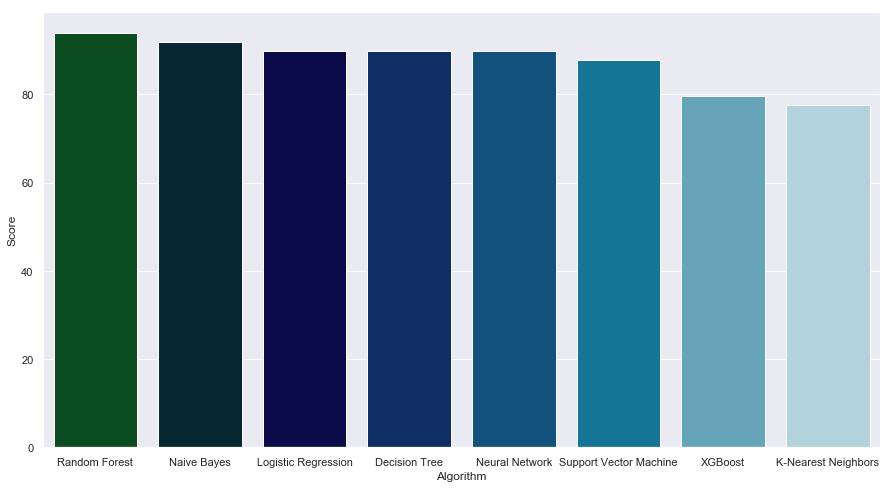

In [32]:
sns.set(rc={'figure.figsize':(15,8)})

sns.barplot(x='Algorithm',y='Score', data=df, palette="ocean")

Come si può vedere, tutti gli algoritmi danno risultati molto soddisfacenti in termini di accuratezza. Gli algoritmi migliori risultano *Random Forest* e *Naive Bayes*, seguiti dalla *Regressione Logistica*, *Decision Tree* e *Reti Neurali* (questi valori valgono naturalmente in riferimento al dataset preso in considerazione e possono variare in base ai dati di input)